In [2]:
text = ""
with open("tourTranscriptTestNoPunc.txt") as f:
    input_text = f.read()
    # input_text = input_text.replace("\n", " ")
    text = input_text.lower()

with open("tourTranscriptTestNoPunc.txt", "w") as f:
    f.write(text)

In [ ]:
import re
with open("logEyrePor.txt", "r") as f:
    log_text = f.read()
    timesTillSendoff = re.findall("Accum: ([0-9]+)ms", log_text)
    timesTillPlayback = re.findall("Process: ([0-9]+)ms", log_text)
    timesTillSendoff = [int(t) for t in timesTillSendoff]
    timesTillPlayback = [int(t) for t in timesTillPlayback]

    print("Average time till sendoff: ", sum(timesTillSendoff) / len(timesTillSendoff))
    print("Average time till playback: ", sum(timesTillPlayback) / len(timesTillPlayback))

    print("Median time until sendoff: ", sorted(timesTillSendoff)[len(timesTillSendoff)//2])
    print("Median time until playback: ", sorted(timesTillPlayback)[len(timesTillPlayback)//2])

Average time till sendoff:  4645.734693877551
Average time till playback:  1867.5102040816328
Median time until sendoff:  4241
Median time until playback:  1752


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

cwd = os.getcwd()
all_files = os.listdir(cwd)
csv_files = [f for f in all_files if f.endswith(".csv")]
for csv in csv_files:
    print(csv)
    df = pd.read_csv(csv)
    print("Mean total latency: ", np.mean(df["total_latency"]))
    print("Median total latency: ", np.median(df["total_latency"]))
    print("Mean processing time: ", np.mean(df["processing_time"]))
    print("Median processing time: ", np.median(df["processing_time"]))
    print("Mean accumulation time: ", np.mean(df["accumulation_time"]))
    print("Median accumulation time: ", np.median(df["accumulation_time"]))
    print("\n")

latency_log_browning_fr-FR.csv
Mean total latency:  17259.145161290322
Median total latency:  15567.0
Mean processing time:  1539.6290322580646
Median processing time:  849.5
Mean accumulation time:  15719.516129032258
Median accumulation time:  12591.0


latency_log_browning_zh-CN.csv
Mean total latency:  17306.94871794872
Median total latency:  13530.0
Mean processing time:  1449.128205128205
Median processing time:  772.0
Mean accumulation time:  15857.76923076923
Median accumulation time:  12701.0


latency_log_eyre_fr-FR.csv
Mean total latency:  5998.142857142857
Median total latency:  5636.0
Mean processing time:  947.6428571428571
Median processing time:  634.5
Mean accumulation time:  5050.357142857143
Median accumulation time:  4868.0




: 

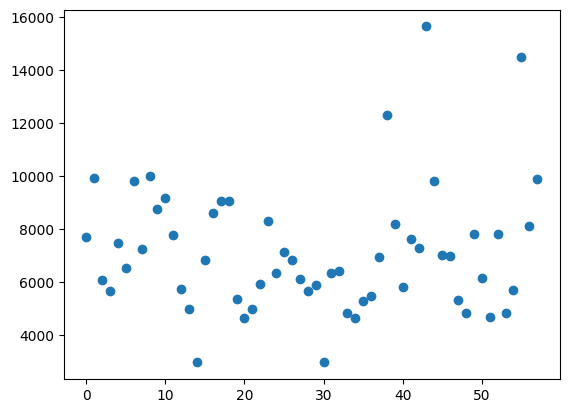

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# df = pd.read_csv("latency_log_eyre_pt-BRa.csv")
# df = pd.read_csv(r"C:\Research\TranslateCapstone\latency_log_eyre_ja-JPa.csv")
# df = pd.read_csv(r"C:\Research\TranslateCapstone\latency_log_eyre_de-DEa.csv")
df = pd.read_csv(r"C:\Research\TranslateCapstone\capstoneRepo\latency_logko-KRb.csv")
# plt.plot(df["playback_start_time"], df["processing_time"])
# plt.show()
# plt.plot(df["playback_start_time"], df["accumulation_time"])
# plt.show()
# plt.plot(df["playback_start_time"], df["total_latency"])
# plt.show()
# plt.plot(df["playback_start_time"], df["gap_ms"])
# plt.show()
x = np.arange(len(df))
plt.scatter(x, df["total_latency_ms"])
# plt.plot(df["playback_latency_ms"])


['ja-JP' 'ko-KR' 'zh-CN']
ja-JP at speed 1.3:
Mean Playback Queue Latency:  8499.56
Median Playback Queue Latency:  9945.0



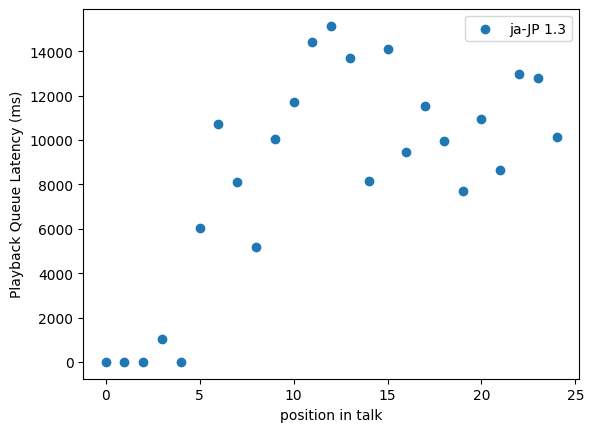

ja-JP at speed 1.5:
Mean Playback Queue Latency:  3701.68
Median Playback Queue Latency:  2596.0



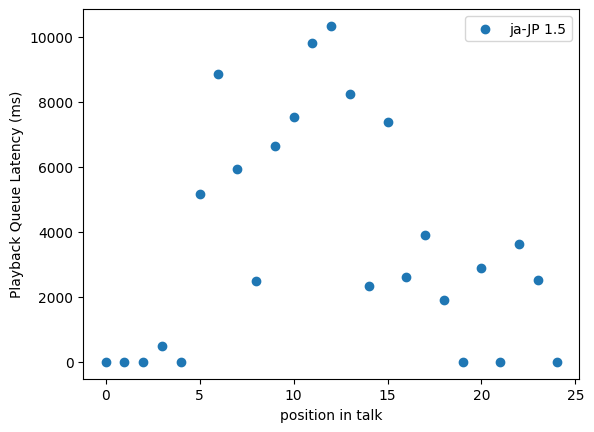

ja-JP at speed 1.7:
Mean Playback Queue Latency:  2189.28
Median Playback Queue Latency:  722.0



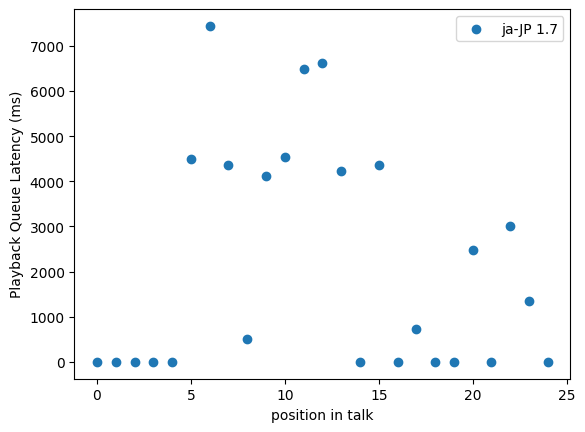

ko-KR at speed 1.3:
Mean Playback Queue Latency:  6141.48
Median Playback Queue Latency:  6689.0



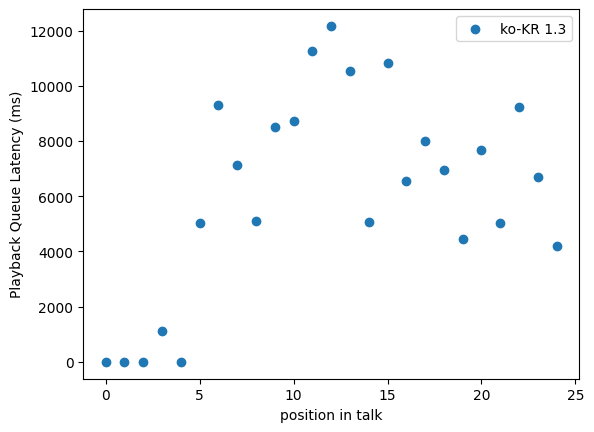

ko-KR at speed 1.5:
Mean Playback Queue Latency:  2521.72
Median Playback Queue Latency:  1204.0



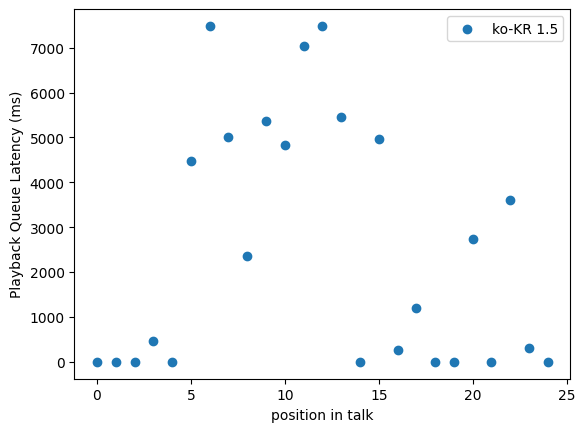

ko-KR at speed 1.7:
Mean Playback Queue Latency:  1580.6
Median Playback Queue Latency:  228.0



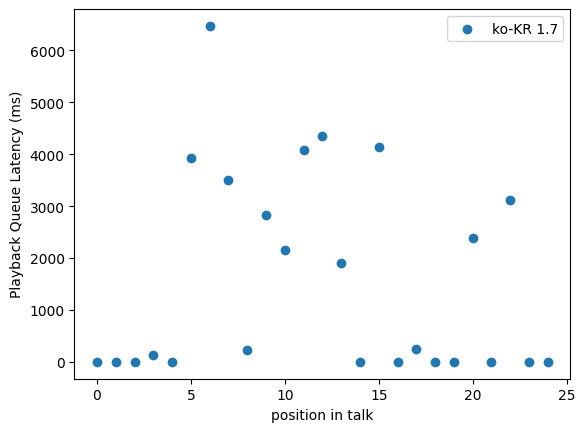

zh-CN at speed 1.3:
Mean Playback Queue Latency:  896.16
Median Playback Queue Latency:  12.0



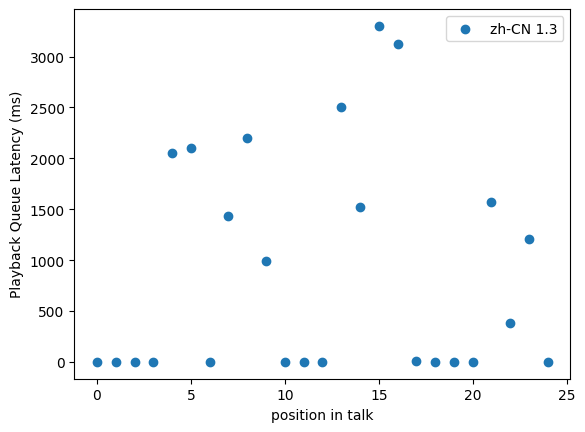

zh-CN at speed 1.5:
Mean Playback Queue Latency:  548.52
Median Playback Queue Latency:  1.0



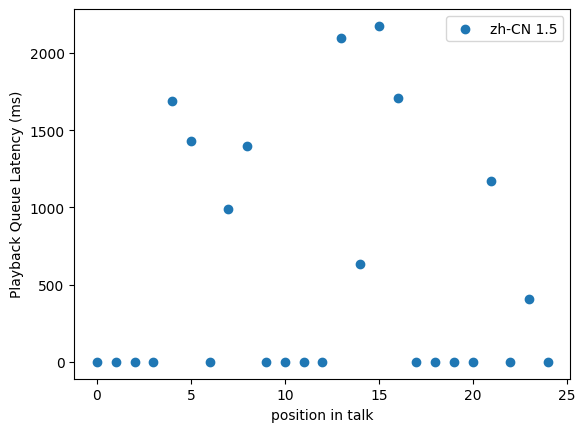

zh-CN at speed 1.7:
Mean Playback Queue Latency:  385.16
Median Playback Queue Latency:  1.0



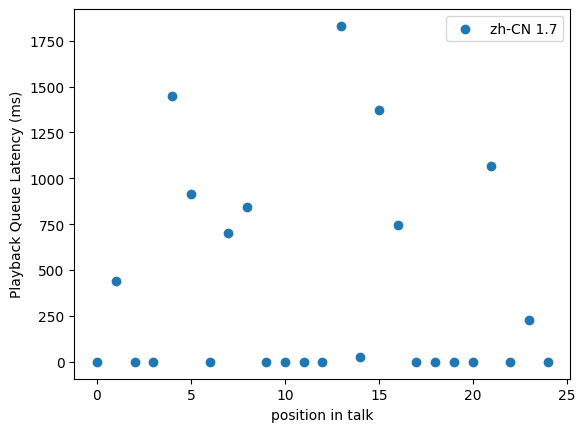

In [34]:
# Language,Speed,ID,ASR_Latency,Playback_Queue_Latency,Total_Latency
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("benchmark_resultsGoodD.csv")
languages = df["Language"].unique()
speeds = df["Speed"].unique()
print(languages)
for lang in languages:
    for speed in speeds:
        lang_speed_df = df[(df["Language"] == lang) & (df["Speed"] == speed)]
        print(f"{lang} at speed {speed}:")
        print("Mean Playback Queue Latency: ", np.mean(lang_speed_df["Playback_Queue_Latency"]))
        print("Median Playback Queue Latency: ", np.median(lang_speed_df["Playback_Queue_Latency"]))
        print()
        plt.scatter(x=np.arange(len(lang_speed_df)), y=lang_speed_df["Playback_Queue_Latency"], label=f"{lang} {speed}")
        plt.xlabel("position in talk")
        plt.ylabel("Playback Queue Latency (ms)")
        plt.legend()
        plt.show()


